In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

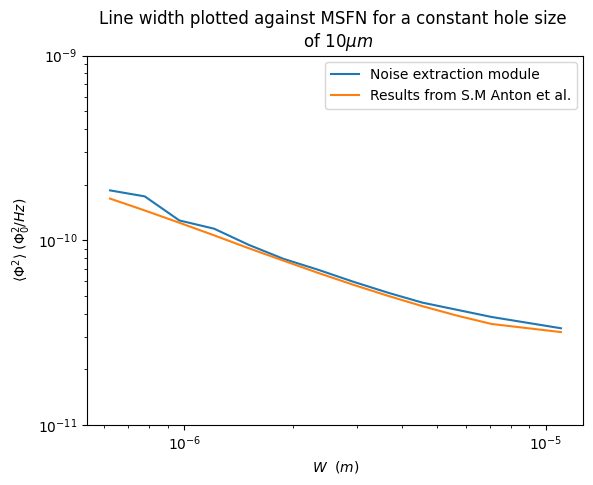

In [10]:
res = pd.read_csv("stevecomp.csv")
steve = pd.read_csv("stevenfiltered.csv")


res_rm = res[res["remiter"] == 2].copy()
res_rm["W"] = res_rm["W"]*1e6
# sns.relplot(data=res_rm,x="W",y="numerical",kind="line")

# plt.xscale("log")
# plt.yscale("log")
# plt.ylim(10e-12,10e-10)
# plt.show()


steve[["garb","phi1","phi2","phi3"]] = steve["content"].str.split("\\t",expand=True)
cd = {
    'phi1' : float,
    'phi2' : float,
    'phi3' : float
    }

steve = steve.astype(cd)
steve["match"] = steve["match"] - 1

res = res[(res["remiter"] == 2) & (res["simiter"] != 0)]
res = res.reset_index(drop=True)



# print(steve["phi1"] + steve["phi2"] + steve["phi3"])

steve = steve[steve["match"] != 13]
steve = steve[steve["match"] <= 17]

steve = steve.reset_index(drop=True)
steve


res["steve"] = steve["phi1"] + steve["phi2"] + steve["phi3"]

res["error"] = (res["steve"] - res["numerical"])/res["numerical"] * 100

res = res[:-4]

fig,ax = plt.subplots()

sns.lineplot(data=res,x="W",y="numerical",ax=ax,label="Noise extraction module")

sns.lineplot(data=res,x="W",y="steve",ax=ax, label="Results from S.M Anton et al.")
# ax.legend(["",""])

plt.xscale("log")
plt.yscale("log")
plt.ylim(10e-12,10e-10)

plt.xlabel("$W$  $(m)$")
plt.ylabel('$\\langle \\Phi^2 \\rangle$ $(\\Phi_0^2/Hz)$')

plt.title("Line width plotted against MSFN for a constant hole size \n of $10 \\mu m$")




plt.show()




In [4]:
res

,simiter,remiter,R,W,numerical,elementcount,nodecount,meshtime,tthtime,nextime,steve,error
0,1,2,0.000005,6.235141e-07,1.862980e-10,33114,9560,5.931155,56.058364,0.331351,1.681748e-10,-9.728070
1,2,2,0.000005,7.775396e-07,1.729060e-10,29228,8691,4.840249,43.009008,0.277674,1.450781e-10,-16.094236
2,3,2,0.000005,9.696137e-07,1.280640e-10,44508,13311,7.881287,68.072888,0.536625,1.244803e-10,-2.798366
3,4,2,0.000005,1.209136e-06,1.155970e-10,45853,13709,8.054396,70.046933,0.407115,1.064178e-10,-7.940691
4,5,2,0.000005,1.507826e-06,9.448820e-11,60710,18122,10.494359,112.618989,0.980297,9.058560e-11,-4.130251
5,6,2,0.000005,1.880302e-06,7.939220e-11,78017,23311,18.343465,154.336907,2.959115,7.762220e-11,-2.229438
6,7,2,0.000005,2.344789e-06,6.930080e-11,80679,24288,18.286005,148.334517,1.063543,6.663430e-11,-3.847719
7,8,2,0.000005,2.924018e-06,5.979620e-11,85192,25972,19.182782,166.682817,1.534587,5.757250e-11,-3.718798
8,9,2,0.000005,3.646332e-06,5.215800e-11,85962,26205,16.340532,146.321696,0.887946,5.016980e-11,-3.811879
9,10,2,0.000005,4.547079e-06,4.602950e-11,88168,27493,17.187687,142.121998,0.843344,4.404940e-11,-4.301806
